In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'../data/raw/data.csv', encoding='latin1')
print("Original shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_19336\22551613.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Original shape: (541909, 8)
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Rename to project columns
df = df.rename(columns={
    'InvoiceNo': 'order',
    'CustomerID': 'customer_id', 
    'Description': 'product_name',
    'Quantity': 'quantity',
    'UnitPrice': 'unit_price',
    'InvoiceDate': 'order_date'
})

# Add derived columns
df['product_category'] = df['product_name'].astype(str).str.split().str[0]
df['product_id'] = (df['product_name'].astype(str) + '_' + df['order'].astype(str)).str[:10]
df['total_price'] = df['quantity'] * df['unit_price']
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Clean: drop nulls, negatives, sample 10k for speed
df = df.dropna(subset=['customer_id', 'order_date', 'quantity', 'unit_price'])
df = df[df['quantity'] > 0][df['total_price'] > 0].head(10000).reset_index(drop=True)
print("Processed shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
df.sample(5)


C:\Users\HP\AppData\Local\Temp\ipykernel_19336\3221211862.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['quantity'] > 0][df['total_price'] > 0].head(10000).reset_index(drop=True)


Processed shape: (10000, 11)

Dtypes:
 order                       object
StockCode                   object
product_name                object
quantity                     int64
order_date          datetime64[ns]
unit_price                 float64
customer_id                float64
Country                     object
product_category            object
product_id                  object
total_price                float64
dtype: object


,order,StockCode,product_name,quantity,order_date,unit_price,customer_id,Country,product_category,product_id,total_price
38,536370,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,20,2010-12-01 08:45:00,0.85,12583.0,France,CHARLOTTE,CHARLOTTE,17.00
349,536401,21744,SNOWFLAKE PORTABLE TABLE LIGHT,2,2010-12-01 11:21:00,2.95,15862.0,United Kingdom,SNOWFLAKE,SNOWFLAKE,5.90
5851,537131,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,1,2010-12-05 12:26:00,2.95,15716.0,United Kingdom,PAPER,PAPER CHAI,2.95
8025,537256,22633,HAND WARMER UNION JACK,96,2010-12-06 11:06:00,1.85,16210.0,United Kingdom,HAND,HAND WARME,177.60
5690,537126,22847,BREAD BIN DINER STYLE IVORY,1,2010-12-05 12:13:00,16.95,18118.0,United Kingdom,BREAD,BREAD BIN,16.95


In [5]:
# Rename to project columns
df = df.rename(columns={
    'InvoiceNo': 'order',
    'CustomerID': 'customer_id', 
    'Description': 'product_name',
    'Quantity': 'quantity',
    'UnitPrice': 'unit_price',
    'InvoiceDate': 'order_date'
})

# Add derived columns
df['product_category'] = df['product_name'].astype(str).str.split().str[0]
df['product_id'] = (df['product_name'].astype(str) + '_' + df['order'].astype(str)).str[:10]
df['total_price'] = df['quantity'] * df['unit_price']
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Clean: drop nulls, negatives, sample 10k for speed
df = df.dropna(subset=['customer_id', 'order_date', 'quantity', 'unit_price'])
df = df[df['quantity'] > 0][df['total_price'] > 0].head(10000).reset_index(drop=True)
print("Processed shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
df.sample(5)


Processed shape: (10000, 11)

Dtypes:
 order                       object
StockCode                   object
product_name                object
quantity                     int64
order_date          datetime64[ns]
unit_price                 float64
customer_id                float64
Country                     object
product_category            object
product_id                  object
total_price                float64
dtype: object


,order,StockCode,product_name,quantity,order_date,unit_price,customer_id,Country,product_category,product_id,total_price
3652,536821,22430,ENAMEL WATERING CAN CREAM,1,2010-12-02 17:17:00,4.95,17757.0,United Kingdom,ENAMEL,ENAMEL WAT,4.95
9262,537399,22625,RED KITCHEN SCALES,1,2010-12-06 14:31:00,8.50,13030.0,United Kingdom,RED,RED KITCHE,8.50
4223,536943,22748,POPPY'S PLAYHOUSE KITCHEN,2,2010-12-03 12:11:00,2.10,17884.0,United Kingdom,POPPY'S,POPPY'S PL,4.20
5622,537081,22554,PLASTERS IN TIN WOODLAND ANIMALS,24,2010-12-05 12:00:00,1.65,15332.0,Lithuania,PLASTERS,PLASTERS I,39.60
1093,536526,22624,IVORY KITCHEN SCALES,6,2010-12-01 12:58:00,8.50,14001.0,United Kingdom,IVORY,IVORY KITC,51.00


In [6]:
# KPIs (keep)
total_sales = df['total_price'].sum()
total_orders = df['order'].nunique()
avg_order_value = df.groupby('order')['total_price'].sum().mean()
unique_customers = df['customer_id'].nunique()

print(f"Total Sales: £{total_sales:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: £{avg_order_value:.2f}")
print(f"Unique Customers: {unique_customers:,}")

# FIXED SAVE (3 ../ to root)
import os
os.makedirs('../data/processed', exist_ok=True)
df.to_csv('../data/processed/sales_clean.csv', index=False)
print("✓ Saved!")


Total Sales: £193,552.89
Total Orders: 521
Average Order Value: £371.50
Unique Customers: 390
✓ Saved!


C:\Users\HP\AppData\Local\Temp\ipykernel_19336\123407366.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('order_date')['total_price'].resample('M').sum().plot(title='Sales Trends')
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


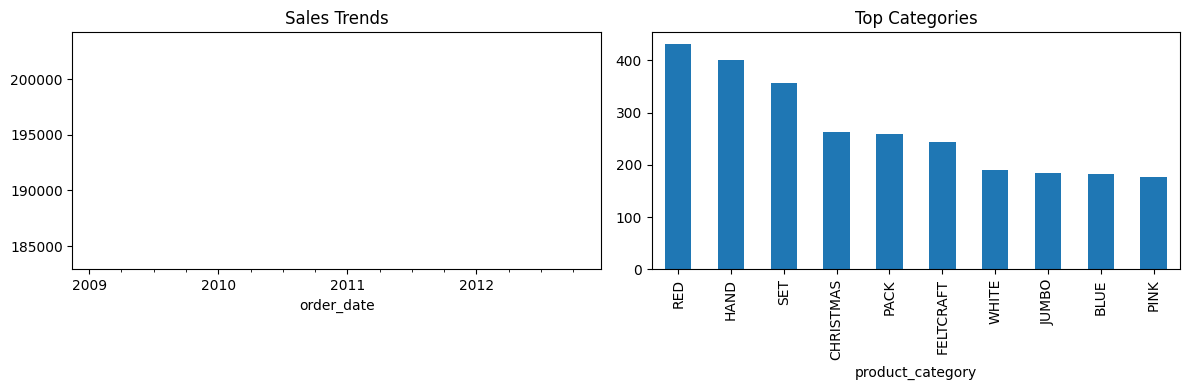

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df.set_index('order_date')['total_price'].resample('M').sum().plot(title='Sales Trends')
plt.subplot(1, 2, 2)
df['product_category'].value_counts().head(10).plot(kind='bar', title='Top Categories')
plt.tight_layout()
plt.show()
